In [ ]:
## Import necessary Libraries

import pandas as pd
import matplotlib as plt


In [ ]:
pip install Keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 6.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
from keras.layers import Input, Dense
from keras import regularizers
from tensorflow.python import tf2
from keras import distribute
from keras import models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

import gensim
from gensim import corpora

In [ ]:
## Upload the dataset

from google.colab import files
data_to_load = files.upload()

Saving Online Payment Fraud Detection.csv to Online Payment Fraud Detection.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Online Payment Fraud Detection.csv']))

In [ ]:
#View the first set of rows

df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [ ]:
#View the tail rows

df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [ ]:
# Check missing data if any.

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
# View the type of dataset entry.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
#create amountOrig column by substracting newbalance Orig from  oldbalanceOrig columns

df['amountOrig'] = df.oldbalanceOrg - df.newbalanceOrig

#check the result:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14


In [ ]:
#create amountDest column by substracting newbalanceDest and oldbalanceDest columns

df['amountDest'] = df.newbalanceDest - df.oldbalanceDest

#check the result:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14,0.0


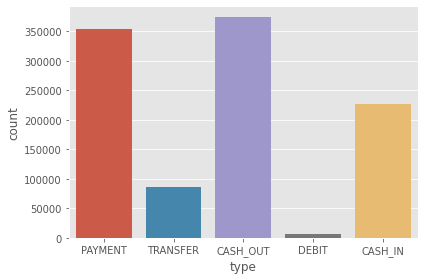

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
ax=sns.countplot(x='type', data=df)
plt.tight_layout()

In [ ]:
# Extracting the unique value in each column

print("type", df["type"].unique())
print("nameOrig",df["nameOrig"].unique())
print("nameDest", df["nameOrig"].unique())


type ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig ['C1231006815' 'C1666544295' 'C1305486145' ... 'C2037964975' 'C1633237354'
 'C1264356443']
nameDest ['C1231006815' 'C1666544295' 'C1305486145' ... 'C2037964975' 'C1633237354'
 'C1264356443']


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
print (f'step: {df.step.nunique()}')
print (f'type: {df.type.nunique()}')
print (f'amount: {df.amount.nunique()}')
print (f'nameOrig: {df.nameOrig.nunique()}')
print (f'oldbalanceOrg: {df.oldbalanceOrg.nunique()}')
print (f'newbalanceOrig: {df.newbalanceOrig.nunique()}')
print (f'nameDest: {df.nameDest.nunique()}')
print (f'oldbalanceDest: {df.oldbalanceDest.nunique()}')
print (f'newbalanceDest: {df.newbalanceDest.nunique()}')
print (f'isFraud: {df.isFraud.nunique()}')

step: 95
type: 5
amount: 1009606
nameOrig: 1048317
oldbalanceOrg: 391033
newbalanceOrig: 440792
nameDest: 449635
oldbalanceDest: 590110
newbalanceDest: 437054
isFraud: 2


In [ ]:
#Summary of transaction type

df.groupby('type').amount.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,227130,169923,128433,1,70368,143609,240644,1781905
CASH_OUT,373641,184039,163347,0,76237,154200,258654,10000000
DEBIT,7178,5878,16259,0,1617,3247,5692,569077
PAYMENT,353873,11122,9814,0,4062,8597,15284,115264
TRANSFER,86753,634403,608068,2,203422,460761,880790,10000000


In [ ]:
# Summary shows the the following

# 1. That CashOut has the highest counts, next to Payment and Cash_in.

In [ ]:
df.shape

(1048575, 12)

In [ ]:
# Question
#1. Which is the highest amount transacted?
#df.amount.max()
#2. which is the highest newbalanceDest transacted?
#3. Which is the highest oldbalanceDest transacted?


In [ ]:
# The highest amount is;
df.amount.max()

10000000.0

In [ ]:
df.amount.min()

0.1

In [ ]:
df[df.amount == df.amount.min()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
357597,17,PAYMENT,0.1,C938188576,0.0,0.0,M1481535853,0.0,0.0,0,0.0,0.0


In [ ]:
#Display the table of the max amount;

#Observation is that all the transaction of this range are fraud.


df[df.amount == df.amount.max()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
4440,4,TRANSFER,10000000.0,C7162498,12900000.0,2930418.44,C945327594,0.00,0.00,1,9969581.56,0.00
4441,4,CASH_OUT,10000000.0,C351297720,10000000.0,0.00,C766681183,0.00,9941904.21,1,10000000.00,9941904.21
481250,19,TRANSFER,10000000.0,C416779475,11900000.0,1861008.32,C380259496,0.00,0.00,1,10038991.68,0.00
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.0,0.00,C1622860679,504326.62,10300000.00,1,10000000.00,9795673.38
586311,33,TRANSFER,10000000.0,C1439740840,19900000.0,9887819.06,C875288652,0.00,0.00,1,10012180.94,0.00
586312,33,CASH_OUT,10000000.0,C29118015,10000000.0,0.00,C1379703840,0.00,10000000.00,1,10000000.00,10000000.00
1030559,72,TRANSFER,10000000.0,C53057884,18600000.0,8594065.09,C588547519,0.00,0.00,1,10005934.91,0.00
1030560,72,CASH_OUT,10000000.0,C1438388258,10000000.0,0.00,C1089455271,81810.42,10100000.00,1,10000000.00,10018189.58
1030661,82,TRANSFER,10000000.0,C1237313447,11000000.0,987591.59,C1468356154,0.00,0.00,1,10012408.41,0.00
1030662,82,CASH_OUT,10000000.0,C1079335762,10000000.0,0.00,C615227407,373274.84,10400000.00,1,10000000.00,10026725.16


In [ ]:
#Display amount greater than 5million, 
#Observation is that over 70% are fraud.
df[df.amount >5000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
4440,4,TRANSFER,10000000.00,C7162498,12900000.00,2930418.44,C945327594,0.00,0.00,1,9969581.56,0.00
4441,4,CASH_OUT,10000000.00,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1,10000000.00,9941904.21
10395,7,TRANSFER,5460002.91,C666654362,5460002.91,0.00,C1726301214,0.00,0.00,1,5460002.91,0.00
10396,7,CASH_OUT,5460002.91,C1588880909,5460002.91,0.00,C1570256460,0.00,9281535.44,1,5460002.91,9281535.44
16720,8,TRANSFER,5677662.29,C293394374,0.00,0.00,C1856036778,8427389.99,13700000.00,0,0.00,5272610.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1030716,86,CASH_OUT,6972164.97,C1268472825,6972164.97,0.00,C2126149202,5680.28,6977845.25,1,6972164.97,6972164.97
1030731,88,TRANSFER,9345700.07,C1453976647,9345700.07,0.00,C1454683123,0.00,0.00,1,9345700.07,0.00
1030732,88,CASH_OUT,9345700.07,C399518124,9345700.07,0.00,C2125071302,8922060.43,18300000.00,1,9345700.07,9377939.57
1030755,90,TRANSFER,7696836.35,C1641731466,7696836.35,0.00,C290559240,0.00,0.00,1,7696836.35,0.00


In [ ]:
#Display of transaction above 3million;
#Observation is that 60% are fraud;
df[df.amount >3000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1153,1,TRANSFER,3776389.09,C197491520,0.00,0.00,C1883840933,10100000.00,16900000.00,0
4440,4,TRANSFER,10000000.00,C7162498,12900000.00,2930418.44,C945327594,0.00,0.00,1
4441,4,CASH_OUT,10000000.00,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1
10395,7,TRANSFER,5460002.91,C666654362,5460002.91,0.00,C1726301214,0.00,0.00,1
10396,7,CASH_OUT,5460002.91,C1588880909,5460002.91,0.00,C1570256460,0.00,9281535.44,1
...,...,...,...,...,...,...,...,...,...,...
1045788,95,TRANSFER,3122347.40,C426999957,7914.58,0.00,C1127061789,6840576.09,9962923.49,0
1045828,95,TRANSFER,3757663.90,C722035611,49120.19,0.00,C1686666134,5443131.61,9200795.52,0
1046593,95,TRANSFER,3605241.70,C971075452,0.00,0.00,C273747506,4938367.64,8543609.34,0
1047484,95,TRANSFER,3148886.01,C857538059,18166.13,0.00,C1022342908,3427656.32,6576542.33,0


In [ ]:
df[df.amount >1000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19200000.00,0
94,1,TRANSFER,1724887.05,C1495608502,0.00,0.0,C1590550415,3470595.10,19200000.00,0
358,1,TRANSFER,1538200.39,C476579021,0.00,0.0,C1590550415,6977445.38,19200000.00,0
359,1,TRANSFER,2421578.09,C106297322,0.00,0.0,C1590550415,8515645.77,19200000.00,0
...,...,...,...,...,...,...,...,...,...,...
1047984,95,TRANSFER,1838279.08,C1817137020,493951.29,0.0,C809171271,1879283.01,3717562.09,0
1048011,95,TRANSFER,1339844.75,C1604159675,0.00,0.0,C891089759,31500000.00,32800000.00,0
1048027,95,TRANSFER,3572499.78,C1076671504,0.00,0.0,C1411451832,3835064.84,7407564.62,0
1048082,95,TRANSFER,2905341.96,C1244477950,41666.26,0.0,C1839656095,7592851.22,10500000.00,0


In [ ]:
df.newbalanceDest.max()

42200000.0

In [ ]:
df[df.newbalanceDest == df.newbalanceDest.max()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
957342,44,CASH_OUT,114496.36,C805835006,466413.59,351917.22,C1854925027,42100000.0,42200000.0,0,114496.37,100000.0


In [ ]:
df.oldbalanceDest.max()

42100000.0

In [ ]:
df[df.oldbalanceDest == df.oldbalanceDest.max()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
957342,44,CASH_OUT,114496.36,C805835006,466413.59,351917.22,C1854925027,42100000.0,42200000.0,0


In [ ]:
# The highest Transacted nameOrig is;

df.nameOrig.max()

'C999999254'

In [ ]:
df[df.nameOrig == df.nameOrig.max()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
768108,39,CASH_OUT,244962.21,C999999254,22027.0,0.0,C667494566,3703055.72,3948017.93,0


In [ ]:
LAL=df.groupby('type').get_group('TRANSFER')

#df.groupby(['type', 'isFraud'])

In [ ]:
LAL

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,181.00,0.00
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,705.00,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,10835.00,2712905.89
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,62610.80,7866.29
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,10363.39,-33857.48
...,...,...,...,...,...,...,...,...,...,...,...,...
1048488,95,TRANSFER,23071.47,C658864787,10518.00,0.0,C1308979018,608936.99,632008.47,0,10518.00,23071.48
1048507,95,TRANSFER,476779.24,C1104878203,19992.00,0.0,C1338644402,0.00,476779.24,0,19992.00,476779.24
1048514,95,TRANSFER,136218.95,C969666269,43866.00,0.0,C1199486666,1756330.45,1892549.39,0,43866.00,136218.94
1048515,95,TRANSFER,169285.09,C969909855,140856.00,0.0,C1753252271,0.00,169285.09,0,140856.00,169285.09


In [ ]:
df.groupby('type').isFraud.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,227130.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CASH_OUT,373641.0,0.001547,0.039301,0.0,0.0,0.0,0.0,1.0
DEBIT,7178.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PAYMENT,353873.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
TRANSFER,86753.0,0.006501,0.080368,0.0,0.0,0.0,0.0,1.0


In [ ]:
#The was a major fraud in Cash_Out and transfer. 

In [ ]:
transaction = ['CASH_OUT', 'TRANSFER']
TRANS = df[df['type'].isin(transaction)]
TRANS

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,181.00,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,15325.00,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,705.00,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
1048553,95,CASH_OUT,103391.93,C2021893664,107623.00,4231.07,C178178755,5752648.68,5856040.61,0,103391.93,103391.93
1048558,95,CASH_OUT,26535.41,C1213094114,104187.00,77651.59,C216374600,205460.26,231995.66,0,26535.41,26535.40
1048565,95,TRANSFER,132387.24,C1654402840,15956.51,0.00,C1878219072,631284.08,763671.32,0,15956.51,132387.24
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0,18002.85,279674.04


In [ ]:
TRANS.groupby('type').isFraud.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_OUT,373641.0,0.001547,0.039301,0.0,0.0,0.0,0.0,1.0
TRANSFER,86753.0,0.006501,0.080368,0.0,0.0,0.0,0.0,1.0


In [ ]:
TRT = df[['type','isFraud']]

transaction = ['CASH_OUT', 'TRANSFER']
TRT = TRT [TRT ['type'].isin(transaction)]

TRT


,type,isFraud
2,TRANSFER,1
3,CASH_OUT,1
15,CASH_OUT,0
19,TRANSFER,0
24,TRANSFER,0
...,...,...
1048553,CASH_OUT,0
1048558,CASH_OUT,0
1048565,TRANSFER,0
1048567,CASH_OUT,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b9480b810>,
      dtype=object)

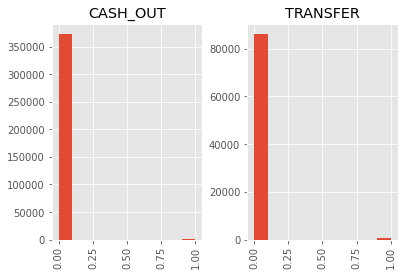

In [ ]:
TRT['isFraud'].hist(by=TRT['type'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b91eac910>,
      dtype=object)

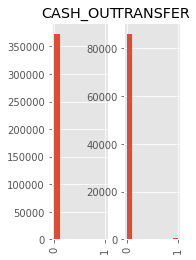

In [ ]:
TRT['isFraud'].hist(by=TRT['type'], layout=(1,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b91facc10>,
      dtype=object)

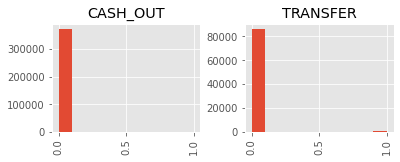

In [ ]:
TRT['isFraud'].hist(by=TRT['type'],layout=(1,5), figsize=(16,2))

In [ ]:
#import both visualizations packages

import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

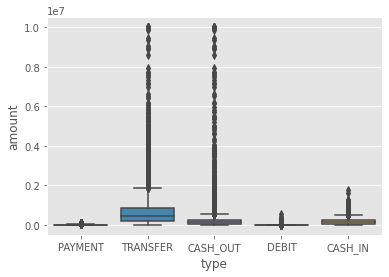

In [ ]:
sns.boxplot(x="type", y="amount", data= df)
plt.show

In [ ]:
pivot = df.groupby(['type','isFraud']).amount.mean().astype(int).unstack('isFraud')
#display the pivot
pivot

isFraud,0,1
type,,
CASH_IN,169923.0,NaN
CASH_OUT,182500.0,1177134.0
DEBIT,5878.0,NaN
PAYMENT,11122.0,NaN
TRANSFER,630647.0,1208507.0


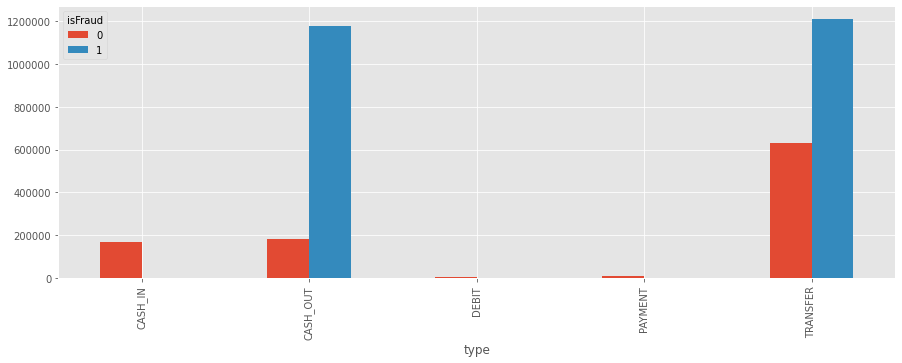

In [ ]:
pivot.plot.bar(figsize=(15,5))
plt.ticklabel_format(style='plain',axis='y') 

plt.show()

In [ ]:
pivot = df.groupby(['amount','amountOrig']).amount.mean().astype(int).unstack('amountOrig')
#display the pivot
pivot

In [ ]:
#Create a subplot to visualize categorical data

f, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x = df["type"], data=df, palette="rocket", ax = axes [1])
sns.countplot(x = df["nameOrig"], data=df, palette="rocket", ax = axes [2])
sns.countplot(x = df["nameDest"], data=df, palette="rocket", ax = axes [3])

plt.show()

<Figure size 792x576 with 0 Axes>

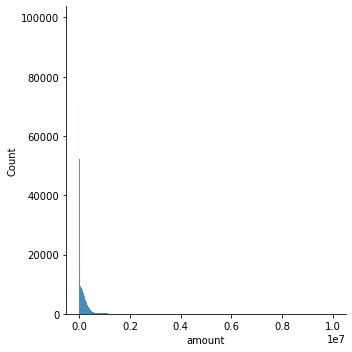

In [ ]:
# amount

plt.figure(figsize = (11,8))
sns.displot(df["amount"])
plt.show()

In [ ]:
# Visualizing the categorical data

f, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x = df["type"], data = df, palette="rocket", ax = axes[1])
sns.countplot(x = df["nameOrig"], data = df, palette="rocket", ax = axes[2])
sns.countplot(x = df["nameDest"], data = df, palette="rocket", ax = axes[3])

plt.show()

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

### Machine Learning - Fraud detection

In [ ]:
# transform categorical data into numerical data - using label Encoder(scikit-learning

from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
# transformation

df["type"] = le.fit_transform(df["type"])
df["nameOrig"] = le.fit_transform(df["nameOrig"])
df["nameDest"] = le.fit_transform(df["nameDest"])

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amountOrig,amountDest
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,9839.64,0.0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,1864.28,0.0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1,181.00,0.0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,181.00,-21182.0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,11668.14,0.0


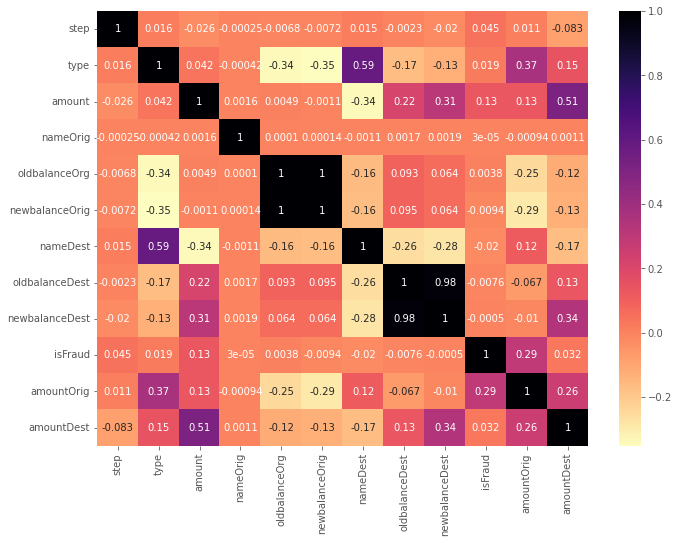

In [ ]:
# Correlation

plt.figure(figsize = (11, 8))
sns.heatmap(df.corr(), annot=True, cmap = "magma_r")

In [ ]:
# Remove the label of the column you want to predict

x = df.drop("isFraud", axis = 1) #dataset without the label 
y = df["isFraud"] #The label (isFraud)

x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,amountOrig,amountDest
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,9839.64,0.0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,1864.28,0.0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,181.00,0.0
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,181.00,-21182.0
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,11668.14,0.0


In [ ]:
#split Dataset into Train and Test Set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (629145, 11)
x_test:  (419430, 11)
y_train:  (629145,)
y_test:  (419430,)


In [ ]:
# Apply Algorithm

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

In [ ]:
model = abc.fit(x_train, y_train)

In [ ]:
#confirm AdaBoostClassifier prediction

pred= model.predict(x_test)

print(pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print("The accuracy for Adaboost is:", round(accuracy_score(y_test, pred)*100), "%")

The accuracy for Adaboost is: 100 %


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Other Algorithm


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



# machine learningMatrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
classifiers =  [
    [RandomForestClassifier(), "Random Forest"],
    [KNeighborsClassifier(),"K-Nearest Neighbors"],
    [SGDClassifier(), "SGD"],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(), "Decision Tree"],
    [LogisticRegression(), "Logistics Regression"]
    
]

In [ ]:
score_list ={}
cross_val ={}
roc_auc ={}
accuracy_s ={}

for i in classifiers:
    model = i[0]
    model.fit(x_train, y_train)
    model_name = i[1]
    pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    cv = cross_val_score(model, x_test, y_test).mean()
    RA = roc_auc_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    score_list[model_name] = ([str(round(score*100, 2)) + "%"])
    cross_val[model_name] = ([str(round(cv*100, 2)) + "%"])
    roc_auc[model_name] = ([str(round(RA*100, 2)) + "%"])
    accuracy_s[model_name] = ([str(round(accuracy*100, 2)) + "%"])

    if model_name != classifiers [-1][1]:
        print("")

In [ ]:
print("Accuracy Score")
AS = pd.DataFrame(score_list)
AS.head()

Accuracy Score


,Random Forest,K-Nearest Neighbors,SGD,Naive Bayes,Decision Tree,Logistics Regression
0,99.97%,99.92%,99.91%,98.06%,99.96%,99.92%


In [ ]:
print("cross validation")
cross_v = pd.DataFrame(cross_val)
cross_v.head()

cross validation


,Random Forest,K-Nearest Neighbors,SGD,Naive Bayes,Decision Tree,Logistics Regression
0,99.97%,99.92%,99.9%,97.97%,99.94%,99.93%


In [ ]:
print("ROC _AUC")
roau = pd.DataFrame(roc_auc)
roau.head()


ROC _AUC


,Random Forest,K-Nearest Neighbors,SGD,Naive Bayes,Decision Tree,Logistics Regression
0,89.48%,71.02%,74.23%,69.88%,90.44%,69.2%
